<a href="https://colab.research.google.com/github/ewattudo/datamanagement/blob/main/PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS 1 - Erick Watt-Udogu

# Setup Code

In [ ]:
#Using code from previous projects and Dr. Adam
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import missingno as msno

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

%matplotlib inline

import pandas as pd
import urllib.request
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

!pip install geopandas==1.0.1
!pip install mapclassify
import geopandas as gpd

import time, webbrowser, zipfile

from google.colab import data_table
data_table.enable_dataframe_formatter()

import plotly.express as px
import plotly.graph_objects as go

!pip install ydata-profiling
from ydata_profiling import ProfileReport

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 68.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=42cbc96c228c44c3533e13cefd0c26700d1259cf9215897a002acf9675349abb
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


# Importing Files

## List of U.S. states and territories by African-American population (HTML)

Source: Wikipedia https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population

In [ ]:
aapop = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population',match="State/Territory")[0].head(65)
aapop.head(5)

,State/Territory,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,United States of America,19.3%,18.9%,19.0%,18.4%,18.1%,16.8%,15.7%,14.1%,12.7%,...,9.7%,9.8%,10.0%,10.5%,11.1%,11.7%,12.1%,12.9%,13.6%,14.2%
1,Alabama,NaN,41.4%,29.0%,33.2%,38.5%,43.3%,44.7%,45.4%,47.7%,...,35.7%,34.7%,32.0%,30.0%,26.2%,25.6%,25.3%,26.0%,26.3%,26.8%
2,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2%,0.2%,NaN,3.0%,3.0%,3.4%,4.1%,4.3%,4.7%,4.8%
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02%,0.04%,0.02%,NaN
4,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3%,0.3%,...,2.5%,3.0%,3.5%,3.3%,3.0%,2.8%,3.0%,3.6%,5.0%,6.2%


## Graduate School Geofence Campaign Data (CSV)

Source: Provided by LocalIQ the Geofence Vendor

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/datamanagement/refs/heads/main/Geofence%20Report%20With%20Creatives.csv", "Geofence.csv")
Geofence = pd.read_csv('Geofence.csv')
Geofence.head(5)

,Date,Campaign Name,Geofences,Impressions,Clicks,CTR,Walk-ins,CPC,CPW,CPM,Spend
0,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Camden Waterfront District\t1 Riverside Drive\...,179,0,0.00%,0,0%,$0.00,$7.05,$1.26
1,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Rowan University\t201 Mullica Hill Road\tGlass...,28356,49,0.17%,0,4.04%,$0.00,$6.98,$197.96
2,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Environmental Protect...,37,0,0.00%,0,0%,$0.00,$6.99,$0.26
3,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Human Services\t222 S...,28,0,0.00%,0,0%,$0.00,$7.01,$0.20
4,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Labor & Workforce Dev...,61,0,0.00%,0,0%,$0.00,$7.22,$0.44


## World Countries (SHP)

Source: World Bank https://datacatalogfiles.worldbank.org/ddh-published/0038272/DR0046659/wb_countries_admin0_10m.zip

In [ ]:
! wget -q -O Countries.zip https://datacatalogfiles.worldbank.org/ddh-published/0038272/DR0046659/wb_countries_admin0_10m.zip
zip_ref = zipfile.ZipFile('Countries.zip', 'r'); zip_ref.extractall(); zip_ref.close()
Countries=gpd.read_file('/content/WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp')
Countries.head(5)

,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,None,260580739,17,3028000.0,2017,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,2,Admin-0 country,2,Sovereign country,Malaysia,None,31381992,15,863000.0,2017,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,3,Admin-0 country,2,Sovereign country,Republic of Chile,None,17789267,14,436100.0,2017,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,None,11138234,14,78350.0,2017,...,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,5,Admin-0 country,2,Sovereign country,Republic of Peru,None,31036656,15,410400.0,2017,...,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


# Reviewing Data

Here I am just taking a look at the files. This will provide me with a plan for manipulating the data inorder to make it useful.

## African American Population

In [ ]:
aapop.head(5)

,State/Territory,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,United States of America,19.3%,18.9%,19.0%,18.4%,18.1%,16.8%,15.7%,14.1%,12.7%,...,9.7%,9.8%,10.0%,10.5%,11.1%,11.7%,12.1%,12.9%,13.6%,14.2%
1,Alabama,NaN,41.4%,29.0%,33.2%,38.5%,43.3%,44.7%,45.4%,47.7%,...,35.7%,34.7%,32.0%,30.0%,26.2%,25.6%,25.3%,26.0%,26.3%,26.8%
2,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2%,0.2%,NaN,3.0%,3.0%,3.4%,4.1%,4.3%,4.7%,4.8%
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02%,0.04%,0.02%,NaN
4,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3%,0.3%,...,2.5%,3.0%,3.5%,3.3%,3.0%,2.8%,3.0%,3.6%,5.0%,6.2%


In [ ]:
#All objects. I am going to have to turn all these into numbers.
aapop.dtypes

,0
State/Territory,object
1790,object
1800,object
1810,object
1820,object
1830,object
1840,object
1850,object
1860,object
1870,object


In [ ]:
#I wasn't planning on updating all the years, but the AI made it easy. It seems to anticipate that I wanted to change it.
aapop['1790'] = aapop['1790'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1800'] = aapop['1800'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1810'] = aapop['1810'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1820'] = aapop['1820'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1830'] = aapop['1830'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1840'] = aapop['1840'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1850'] = aapop['1850'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1860'] = aapop['1860'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1870'] = aapop['1870'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1880'] = aapop['1880'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1890'] = aapop['1890'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1900'] = aapop['1900'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1910'] = aapop['1910'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1920'] = aapop['1920'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1930'] = aapop['1930'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1940'] = aapop['1940'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1950'] = aapop['1950'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1960'] = aapop['1960'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1970'] = aapop['1970'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1980'] = aapop['1980'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1990'] = aapop['1990'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2000'] = aapop['2000'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2010'] = aapop['2010'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2020'] = aapop['2020'].str.replace('[\%]', '', regex=True).astype(float)

AttributeError: Can only use .str accessor with string values!

In [ ]:
aapop.describe()

,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
count,19.000000,26.000000,29.000000,30.000000,31.000000,32.000000,38.000000,45.000000,49.000000,49.000000,...,52.000000,52.000000,51.000000,52.000000,52.000000,52.000000,56.000000,57.000000,57.000000,53.000000
mean,15.352632,16.534615,18.372414,17.683333,19.345161,18.687500,15.992105,13.171111,12.526531,12.571429,...,9.496154,9.253846,9.374510,9.728846,10.021154,10.365385,11.315536,12.007193,12.637018,12.771698
std,14.957806,15.993872,17.620299,17.930807,19.389737,19.595008,18.826640,18.269306,18.141318,18.416354,...,13.434999,12.874621,11.839068,11.991375,12.524444,12.395586,14.720913,14.392811,13.805798,10.193218
min,0.300000,0.400000,0.300000,0.300000,0.200000,0.200000,0.000000,0.000000,0.100000,0.200000,...,0.100000,0.000000,0.000000,0.100000,0.200000,0.200000,0.020000,0.040000,0.020000,1.200000
25%,2.350000,2.950000,2.900000,2.200000,1.650000,1.075000,0.600000,0.300000,0.600000,0.500000,...,0.400000,0.400000,0.850000,1.525000,1.750000,1.800000,2.150000,2.500000,2.900000,5.000000
50%,9.500000,8.900000,13.000000,11.900000,15.500000,12.600000,3.700000,1.600000,1.800000,1.900000,...,3.400000,3.600000,4.400000,5.200000,6.350000,6.900000,6.850000,7.500000,8.700000,9.700000
75%,24.200000,30.150000,32.200000,32.700000,35.400000,33.125000,27.275000,24.900000,22.500000,22.500000,...,13.950000,13.725000,13.200000,12.700000,13.175000,14.025000,15.075000,15.600000,16.100000,17.200000
max,43.700000,44.600000,55.200000,52.800000,58.500000,56.400000,58.900000,58.600000,58.900000,60.700000,...,50.200000,49.200000,45.300000,53.900000,71.100000,70.300000,76.620000,76.190000,76.030000,44.200000


<Axes: >

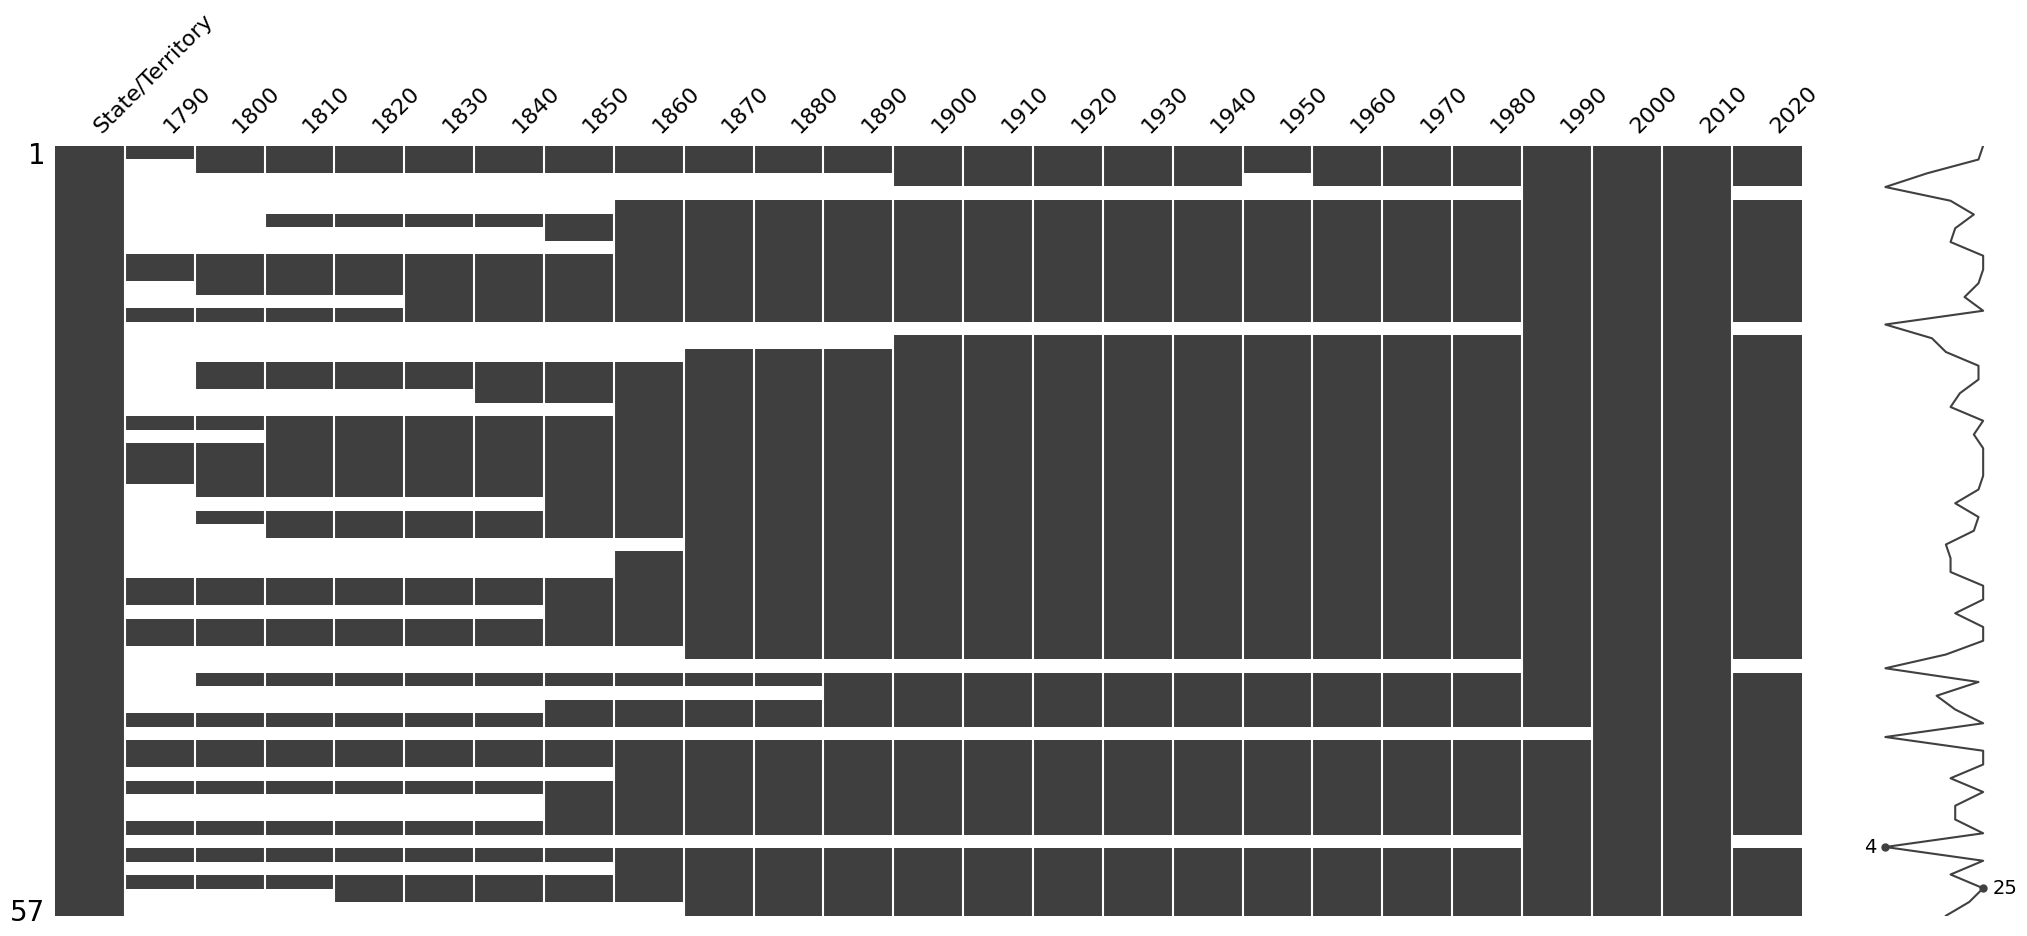

In [ ]:
#This all makes sense. I hypothesize that the missing data is related to when statehood was granted. I think I might just pull 2010 and 2020
msno.matrix(aapop)

In [ ]:
#I want just United States aapop
usaapop = aapop[aapop['State/Territory'] == 'United States of America']

In [ ]:
#I want to create a line graph so of USAAPOP so I need to stack it
usaapop = usaapop.melt(id_vars=['State/Territory'], var_name='Year', value_name='Percentage')

In [ ]:
usaapop.head(5)

,State/Territory,Year,Percentage
0,United States of America,1790,19.3
1,United States of America,1800,18.9
2,United States of America,1810,19.0
3,United States of America,1820,18.4
4,United States of America,1830,18.1


In [ ]:
fig = px.line(usaapop, x="Year", y="Percentage")
fig.show()

In [ ]:
# In aapop I want to remove United States, it is the aggregate
aapop = aapop[aapop['State/Territory'] != 'United States of America']

In [ ]:
#Remove columns 1790 Rank, 2020 Rank and Region. I don't want those anymore
aapop = aapop.drop(columns=['1790 Rank', '2020 Rank', 'Region'])

In [ ]:
# It's too busy. I want parsimony. Let's just look at 2020, 1980, 1940, 1900, 1860, 1820 in ascending order
simpleaapop = aapop[['State/Territory', '2020', '1980', '1940', '1900', '1860', '1820']]

In [ ]:
#I can't get rid of all those digits to the right of the decimal.
simpleaapop.round(2).style.background_gradient(cmap="coolwarm")

,State/Territory,2020,1980,1940,1900,1860,1820
1,Alabama,26.800000,25.600000,34.700000,45.200000,45.400000,33.200000
2,Alaska,4.800000,3.400000,0.200000,0.300000,nan,nan
3,American Samoa,nan,nan,nan,nan,nan,nan
4,Arizona,6.200000,2.800000,3.000000,1.500000,0.300000,nan
5,Arkansas,16.500000,16.300000,24.800000,28.000000,25.600000,11.700000
6,California,7.100000,7.700000,1.800000,0.700000,1.100000,nan
7,Colorado,5.500000,3.500000,1.100000,1.600000,0.100000,nan
8,Connecticut,13.000000,7.000000,1.900000,1.700000,1.900000,2.900000
9,Delaware,24.700000,16.100000,13.500000,16.600000,19.300000,24.000000
10,District of Columbia,44.200000,70.300000,28.200000,31.100000,19.100000,31.200000


In [ ]:
#I want to know which State/Territories had the top 10 highest percentages in 2020 and create a dataframe of just those
top10aapop = aapop.nlargest(10, '2020')
top10aapop.head(5)

,State/Territory,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1960,1970,1980,1990,2000,2010,2020,1790 Rank,2020 Rank,Region
10,District of Columbia,NaN,30.4,33.1,31.2,30.1,29.1,26.6,19.1,33.0,...,53.9,71.1,70.3,65.8,61.3,52.2,44.2,NaN,1.0,Other
27,Mississippi,NaN,41.5,47.0,44.1,48.4,52.3,51.2,55.3,53.7,...,42.0,36.8,35.2,35.6,36.6,37.6,37.9,NaN,2.0,Other
21,Louisiana,NaN,NaN,55.2,51.8,58.5,55.0,50.7,49.5,50.1,...,31.9,29.8,29.4,30.8,32.9,32.8,33.1,NaN,3.0,Other
12,Georgia,35.9,37.1,42.5,44.4,42.6,41.0,42.4,44.0,46.0,...,28.5,25.9,26.8,27.0,29.2,31.5,33.0,3.0,4.0,South
23,Maryland,34.7,36.7,38.2,36.1,34.9,32.3,28.3,24.9,22.5,...,16.7,17.8,22.7,24.9,28.8,30.9,32.0,4.0,5.0,South


In [ ]:
#I need to stack top10aapop so I can make a line graph. I don't want all 50 states.
top10aapop = top10aapop.melt(id_vars=['State/Territory'], var_name='Year', value_name='Percentage')

ValueError: value_name (Percentage) cannot match an element in the DataFrame columns.

In [ ]:
top10aapop.head(5)

,State/Territory,Year,Percentage
0,District of Columbia,1790,NaN
1,Mississippi,1790,NaN
2,Louisiana,1790,NaN
3,Georgia,1790,35.9
4,Maryland,1790,34.7


In [ ]:
# I need to remove '1790 Rank', '2020 Rank' and 'Region' from in the Percentage column
top10aapop = top10aapop[top10aapop['Year'] != '1790 Rank']
top10aapop = top10aapop[top10aapop['Year'] != '2020 Rank']
top10aapop = top10aapop[top10aapop['Year'] != 'Region']

In [ ]:
# I need to move the legend so it doesn't obscure the data on the right
fig = px.line(top10aapop, x="Year", y="Percentage",color="State/Territory")
fig.update_layout(legend=dict(yanchor="top",xanchor="left"))
fig.show()


## Geofence

In [ ]:
Geofence.head(5)

,Date,Campaign Name,Geofences,Impressions,Clicks,CTR,Walk-ins,CPC,CPW,CPM,Spend
0,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Camden Waterfront District\t1 Riverside Drive\...,179,0,0.00%,0,0%,$0.00,$7.05,$1.26
1,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Rowan University\t201 Mullica Hill Road\tGlass...,28356,49,0.17%,0,4.04%,$0.00,$6.98,$197.96
2,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Environmental Protect...,37,0,0.00%,0,0%,$0.00,$6.99,$0.26
3,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Human Services\t222 S...,28,0,0.00%,0,0%,$0.00,$7.01,$0.20
4,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Labor & Workforce Dev...,61,0,0.00%,0,0%,$0.00,$7.22,$0.44


In [ ]:
#All the percentage data needs to be converted from object, but under the "work smarer not harder" maxim, I am going to choose some of the variables to convert.
Geofence.dtypes

,0
Date,object
Campaign Name,object
Geofences,object
Impressions,int64
Clicks,int64
CTR,object
Walk-ins,int64
CPC,object
CPW,object
CPM,object


In [ ]:
#I had to use Gemini to help me get rid of the "$"
Geofence['Spend'] = Geofence['Spend'].str.replace('[\$,]', '', regex=True).astype(float)

In [ ]:
#I was able to do clickthrough rate myself.
Geofence['CTR'] = Geofence['CTR'].str.replace('[\%,]', '', regex=True).astype(float)

<Axes: >

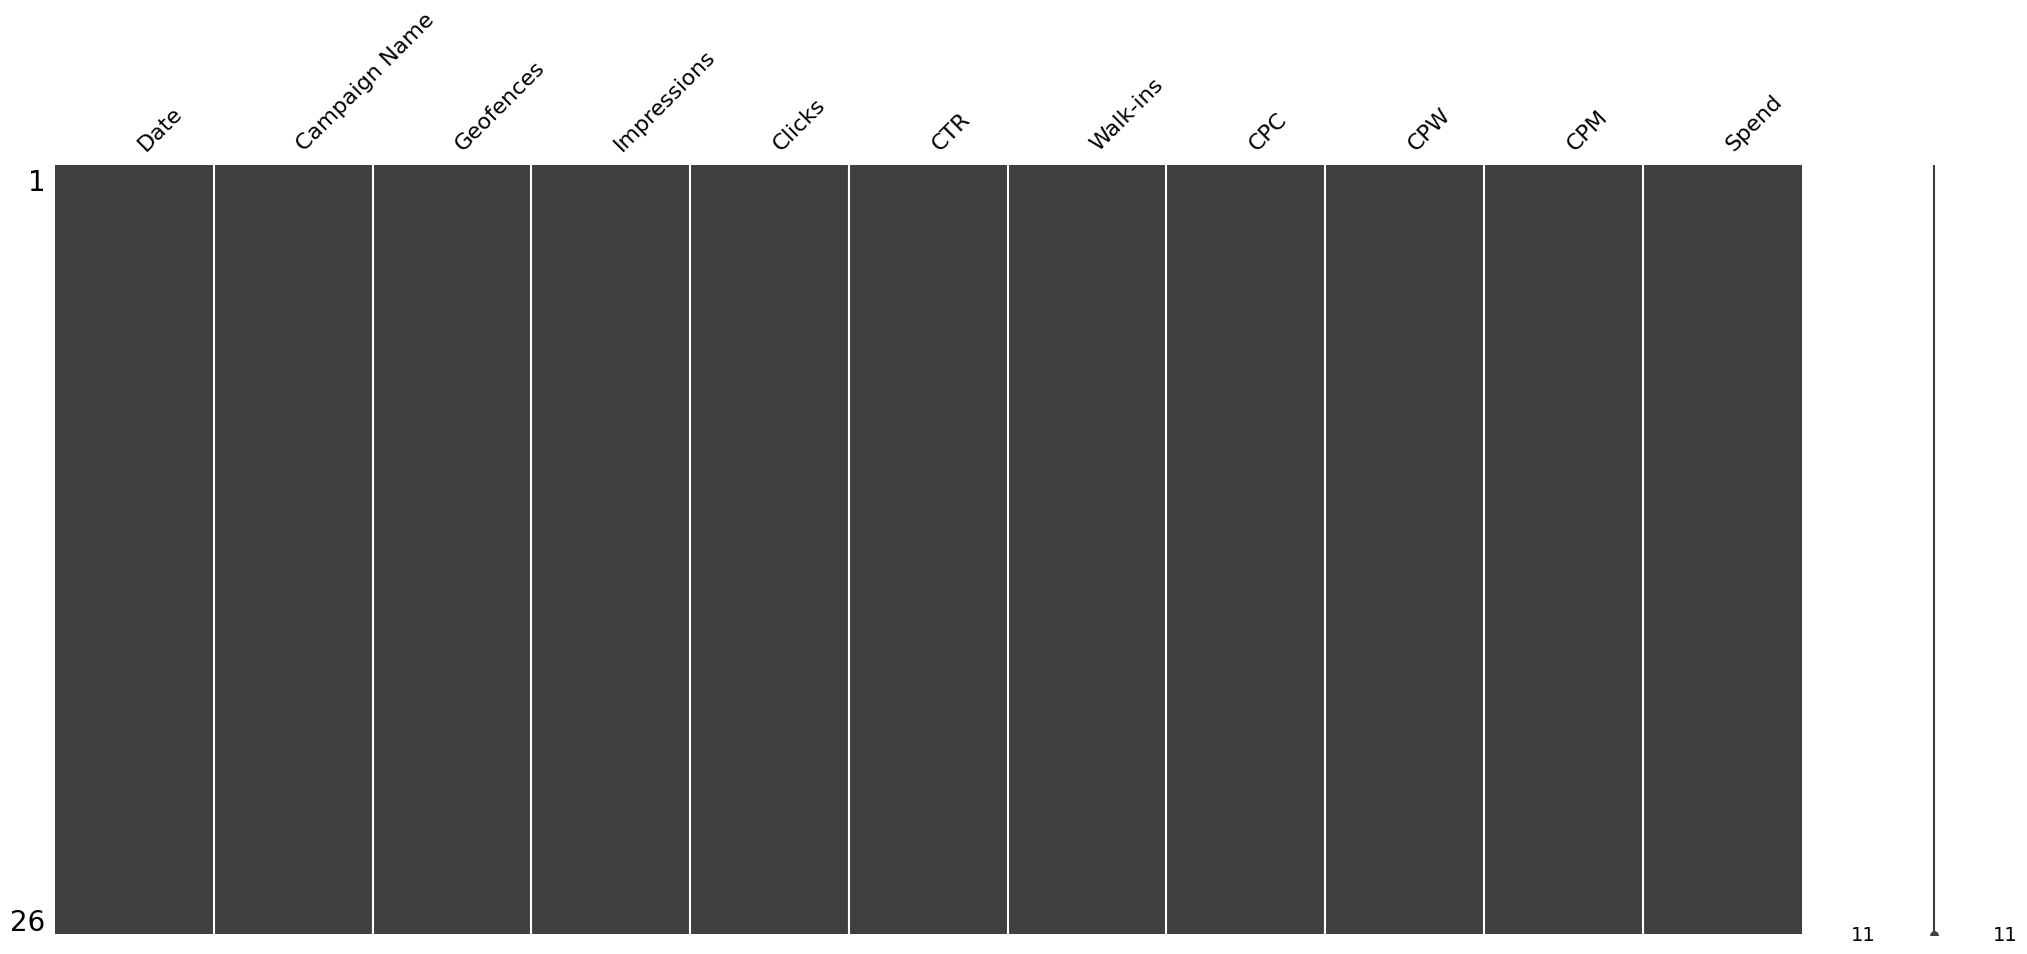

In [ ]:
msno.matrix(Geofence)

In [ ]:
Geofence.describe()

,Impressions,Clicks,CTR,Walk-ins,Spend
count,26.000000,26.000000,26.000000,26.0,26.000000
mean,5807.038462,9.538462,0.125385,0.0,40.782308
std,17729.734650,27.963163,0.143031,0.0,124.351966
min,28.000000,0.000000,0.000000,0.0,0.200000
25%,187.500000,0.000000,0.000000,0.0,1.302500
50%,873.500000,1.000000,0.090000,0.0,6.130000
75%,2751.000000,5.000000,0.217500,0.0,19.312500
max,88372.000000,138.000000,0.480000,0.0,620.090000


### Description and Manipulation

In [ ]:
#Walk-ins column is not needed and there is nothing in it. So I am going to drop it.
Geofence = Geofence.drop(columns=['Walk-ins'])

In [ ]:
#I want to make the geofences meaningful, now they are a bunch of addresses. First I am going to see what I have.
#I organized these around Camden Area, NJGov and Colleges and Universities. I think that will simplify a bit.
print(Geofence.Geofences.unique())

['Camden Waterfront District\t1 Riverside Drive\tCamden\tNJ\t08103'
 'Rowan University\t201 Mullica Hill Road\tGlassboro\tNJ\t08028'
 'New Jersey Department of Environmental Protection\t401 East State Street\tTrenton\tNJ\t08608'
 'New Jersey Department of Human Services\t222 South Warren Street\tTrenton\tNJ\t00860'
 'New Jersey Department of Labor & Workforce Development\t1 John Fitch Plaza\tTrenton\tNJ\t08611'
 'Rider University\t2083 Lawrenceville Road\tLawrenceville\tNJ\t08648'
 'Lockheed Martin\t199 Borton Landing Road\tMoorestown\tNJ\t08057'
 'Camden City Hall\t520 Market Street\tCamden\tNJ\t08102'
 'Stockton University\t101 Vera King Farris Drive\tGalloway\tNJ\t08205'
 'The College of New Jersey\t2000 Pennington Road\tEwing\tNJ\t08628'
 'New Jersey Department of the Treasury\t50 West State Street\tTrenton\tNJ\t08608'
 'New Jersey Department of Children and Families\t50 East State Street\tTrenton\tNJ\t08608'
 'New Jersey Department of Banking and Insurance\t20 West State Street\tT

In [ ]:
mapped_places = {
    "Camden Waterfront District\t1 Riverside Drive\tCamden\tNJ\t08103": "Camden Area",
    "Rowan University\t201 Mullica Hill Road\tGlassboro\tNJ\t08028": "Colleges and Universities",
    "New Jersey Department of Environmental Protection\t401 East State Street\tTrenton\tNJ\t08608": "NJGov",
    "New Jersey Department of Human Services\t222 South Warren Street\tTrenton\tNJ\t00860": "NJGov",
    "New Jersey Department of Labor & Workforce Development\t1 John Fitch Plaza\tTrenton\tNJ\t08611": "NJGov",
    "Rider University\t2083 Lawrenceville Road\tLawrenceville\tNJ\t08648": "Colleges and Universities",
    "Lockheed Martin\t199 Borton Landing Road\tMoorestown\tNJ\t08057": "Camden Area",
    "Camden City Hall\t520 Market Street\tCamden\tNJ\t08102": "Camden Area",
    "Stockton University\t101 Vera King Farris Drive\tGalloway\tNJ\t08205": "Colleges and Universities",
    "The College of New Jersey\t2000 Pennington Road\tEwing\tNJ\t08628": "Colleges and Universities",
    "New Jersey Department of the Treasury\t50 West State Street\tTrenton\tNJ\t08608": "NJGov",
    "New Jersey Department of Children and Families\t50 East State Street\tTrenton\tNJ\t08608": "NJGov",
    "New Jersey Department of Banking and Insurance\t20 West State Street\tTrenton\tNJ\t08608": "NJGov"
}

Geofence["Categories"] = Geofence["Geofences"].map(mapped_places)
Geofence.head(5)

,Date,Campaign Name,Geofences,Impressions,Clicks,CTR,Walk-ins,CPC,CPW,CPM,Spend,Categories
0,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Camden Waterfront District\t1 Riverside Drive\...,179,0,0.00,0,0%,$0.00,$7.05,1.26,Camden Area
1,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Rowan University\t201 Mullica Hill Road\tGlass...,28356,49,0.17,0,4.04%,$0.00,$6.98,197.96,Colleges and Universities
2,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Environmental Protect...,37,0,0.00,0,0%,$0.00,$6.99,0.26,NJGov
3,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Human Services\t222 S...,28,0,0.00,0,0%,$0.00,$7.01,0.20,NJGov
4,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Labor & Workforce Dev...,61,0,0.00,0,0%,$0.00,$7.22,0.44,NJGov


In [ ]:
ProfileReport(Geofence)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
Geofence[['Categories','Impressions', 'Clicks','CTR','Spend']].groupby('Categories').agg(['mean', 'min','max','std','skew']).round(2)

Impressions                             Clicks      \
                                 mean  min    max       std  skew   mean min   
Categories                                                                     
Camden Area                   1161.83   53   2780   1239.45  0.62   1.67   0   
Colleges and Universities    15903.38  187  88372  30761.34  2.39  24.88   0   
NJGov                         1398.75   28   7307   2109.13  2.32   3.25   0   

                                              CTR                         \
                           max    std  skew  mean  min   max   std  skew   
Categories                                                                 
Camden Area                  5   2.07  0.87  0.09  0.0  0.26  0.11  0.90   
Colleges and Universities  138  48.69  2.29  0.11  0.0  0.23  0.10  0.12   
NJGov                       12   4.29  1.16  0.16  0.0  0.48  0.18  0.77   

                            Spend                              
                             mean   min     max     std  skew  
Categories                                                     
Camden Area                  8.16  0.37   19.48    8.68  0.61  
Colleges and Universities  111.46  1.30  620.09  215.79  2.39  
NJGov                        9.98  0.20   52.31   15.11  2.32

In [ ]:
#The Geofences are duplicated. This could be because we are running two different ad treatments or it could be a mistake. I have written to the vendor for clarification.
fig = px.scatter(Geofence, x="CTR", y="Clicks",
                 symbol='Categories', color="Spend",
                 size="Impressions", hover_data=['Geofences'],width=1000,height=750,
                 color_continuous_scale=px.colors.sequential.Turbo)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Comparing Geofence Impressions, Clicks, and Spend Across Categories')

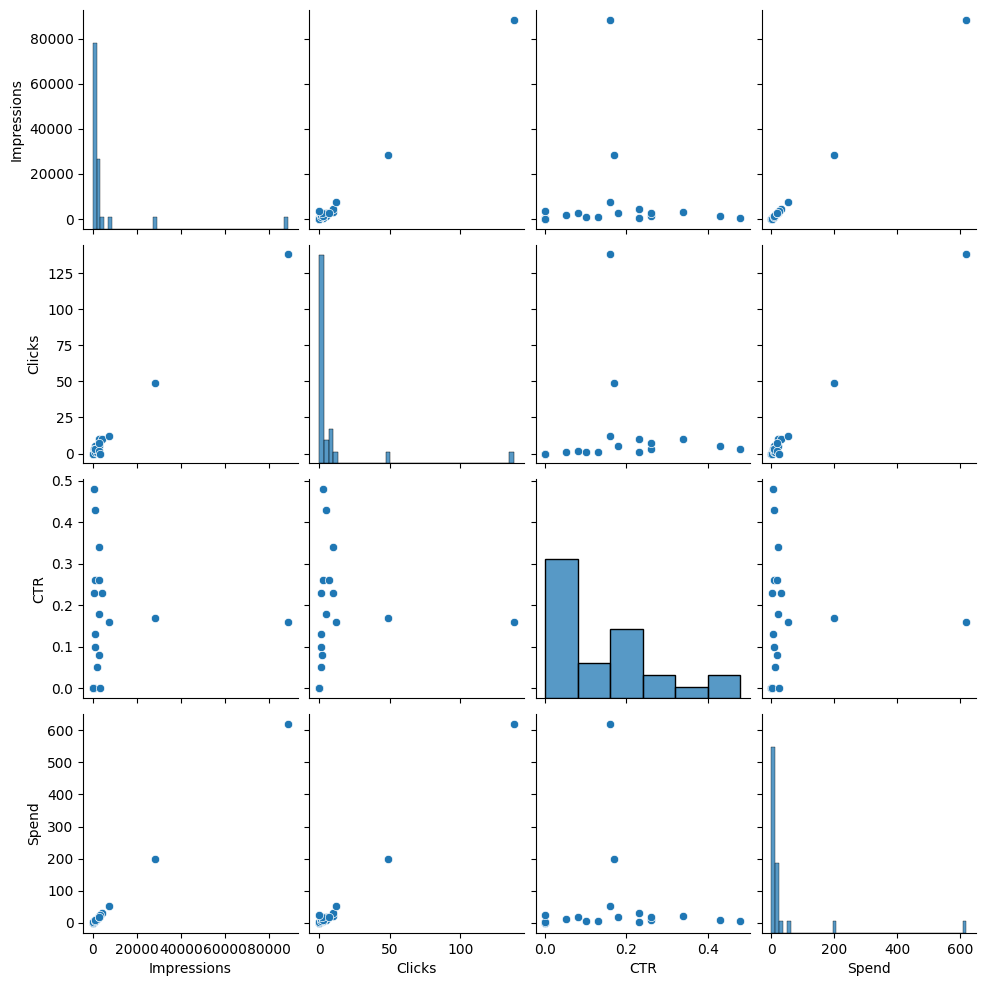

In [ ]:
#I like this plot better, but I would not have noticed my duplicate issue without the plot above.
sns.pairplot(Geofence)

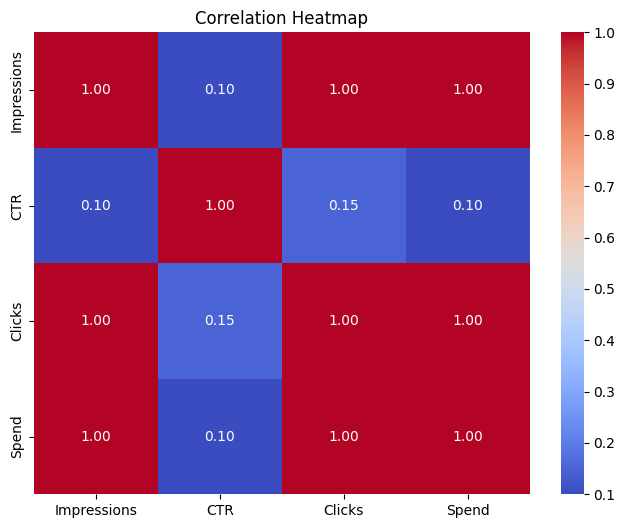

In [ ]:
correlation_table = Geofence[['Impressions', 'CTR', 'Clicks','Spend']].corr().round(2)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## World Data

In [ ]:
Countries.dtypes

,0
OBJECTID,int64
featurecla,object
LEVEL,int32
TYPE,object
FORMAL_EN,object
FORMAL_FR,object
POP_EST,int64
POP_RANK,int32
GDP_MD_EST,float64
POP_YEAR,int32


In [ ]:
Countries.describe()

,OBJECTID,LEVEL,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,Shape_Leng,Shape_Area
count,251.000000,251.0,2.510000e+02,251.000000,2.510000e+02,251.00000,251.000000,251.000000,251.000000,251.000000
mean,126.000000,2.0,2.961458e+07,11.494024,4.815592e+05,1944.52988,1687.051793,1935.179283,63.152872,61.128765
std,72.601653,0.0,1.239078e+08,3.995368,1.943698e+06,375.74860,755.924468,394.988572,217.498918,243.601360
min,1.000000,2.0,0.000000e+00,1.000000,0.000000e+00,0.00000,-99.000000,0.000000,0.004431,0.000001
25%,63.500000,2.0,1.573210e+05,9.000000,3.167000e+03,2017.00000,2001.000000,2016.000000,2.400842,0.051244
50%,126.000000,2.0,4.926330e+06,12.000000,3.501000e+04,2017.00000,2006.000000,2016.000000,18.826169,5.882082
75%,188.500000,2.0,1.783726e+07,14.000000,2.304185e+05,2017.00000,2010.000000,2016.000000,50.510444,37.990619
max,251.000000,2.0,1.379303e+09,18.000000,2.114000e+07,2017.00000,2012.000000,2016.000000,2573.712484,2925.332609


<Axes: >

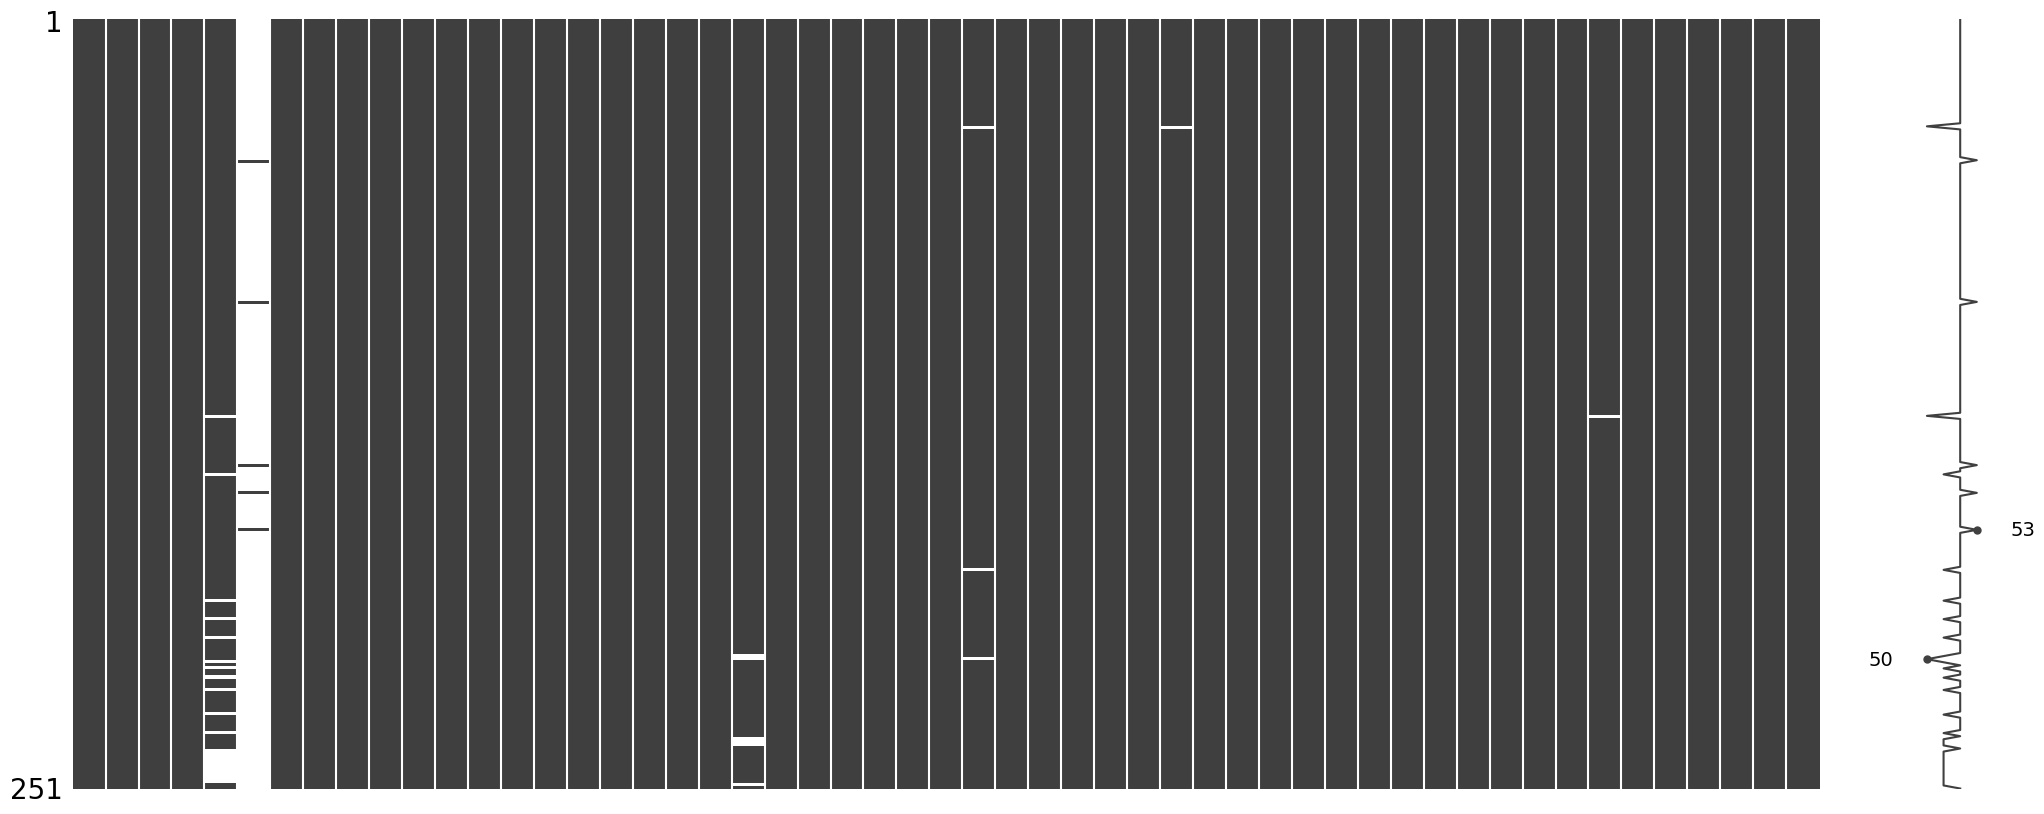

In [ ]:
msno.matrix(Countries)

In [ ]:
#I am going to use Continent and Subregion to subset the data.
print(Countries.CONTINENT.unique())
print(Countries.REGION_UN.unique())
print(Countries.SUBREGION.unique())
print(Countries.REGION_WB.unique())
print(Countries.ECONOMY.unique())

['Asia' 'South America' 'Africa' 'Europe' 'North America' 'Oceania'
 'Seven seas (open ocean)']
['Asia' 'Americas' 'Africa' 'Europe' 'Oceania' 'Seven seas (open ocean)']
['South-Eastern Asia' 'South America' 'Western Asia' 'Southern Asia'
 'Eastern Asia' 'Eastern Africa' 'Western Europe' 'Northern Africa'
 'Central America' 'Middle Africa' 'Eastern Europe' 'Southern Africa'
 'Caribbean' 'Central Asia' 'Northern Europe' 'Southern Europe'
 'Western Africa' 'Northern America' 'Melanesia'
 'Australia and New Zealand' 'Polynesia' 'Seven seas (open ocean)'
 'Micronesia']
['East Asia & Pacific' 'Latin America & Caribbean' 'Europe & Central Asia'
 'South Asia' 'Middle East & North Africa' 'Sub-Saharan Africa'
 'North America' 'Antarctica']
['4. Emerging region: MIKT' '6. Developing region'
 '5. Emerging region: G20' '3. Emerging region: BRIC'
 '2. Developed region: nonG7' '7. Least developed region'
 '1. Developed region: G7']


In [ ]:
Countries[['CONTINENT','POP_EST', 'GDP_MD_EST']].groupby('CONTINENT').agg(['mean', 'min','max']).round(2)

POP_EST                      GDP_MD_EST          \
                                mean     min         max        mean     min   
CONTINENT                                                                      
Africa                   23396980.56  201025   190632261   115724.52  694.00   
Asia                     85891574.16    2801  1379302771  1085274.15   42.02   
Europe                   15067780.51    1000   142257519   527388.96    0.00   
North America            11971719.33     300   326625791   490403.25    0.00   
Oceania                   1700666.52      54    23232413    64102.84    0.00   
Seven seas (open ocean)    206112.78       0     1356388     3785.82    0.00   
South America            32195442.23    2931   207353391   490545.52  281.80   

                                     
                                max  
CONTINENT                            
Africa                    1105000.0  
Asia                     21140000.0  
Europe                    3979000.0  
North America            18560000.0  
Oceania                   1189000.0  
Seven seas (open ocean)     25850.0  
South America             3081000.0

In [ ]:
asia = Countries[Countries['CONTINENT'] == 'Asia']

In [ ]:
asia[['SUBREGION','POP_EST', 'GDP_MD_EST']].groupby('SUBREGION').agg(['mean', 'min','max']).round(2)

POP_EST                       GDP_MD_EST  \
                                 mean      min         max        mean   
SUBREGION                                                                
Central Asia             1.358290e+07  5351277    29748859   160908.00   
Eastern Asia             2.275779e+08   601969  1379302771  4081231.43   
Seven seas (open ocean)  2.801000e+03     2801        2801       42.02   
South-Eastern Asia       5.880654e+07   443593   260580739   671491.36   
Southern Asia            2.266732e+08   758288  1281935911  1521916.50   
Western Asia             1.440262e+07  1221549    80845215   356333.38   

                                                
                              min          max  
SUBREGION                                       
Central Asia             21010.00    460700.00  
Eastern Asia             37000.00  21140000.00  
Seven seas (open ocean)     42.02        42.02  
South-Eastern Asia        4975.00   3028000.00  
Southern Asia             6432.00   8721000.00  
Western Asia             21220.77   1731000.00

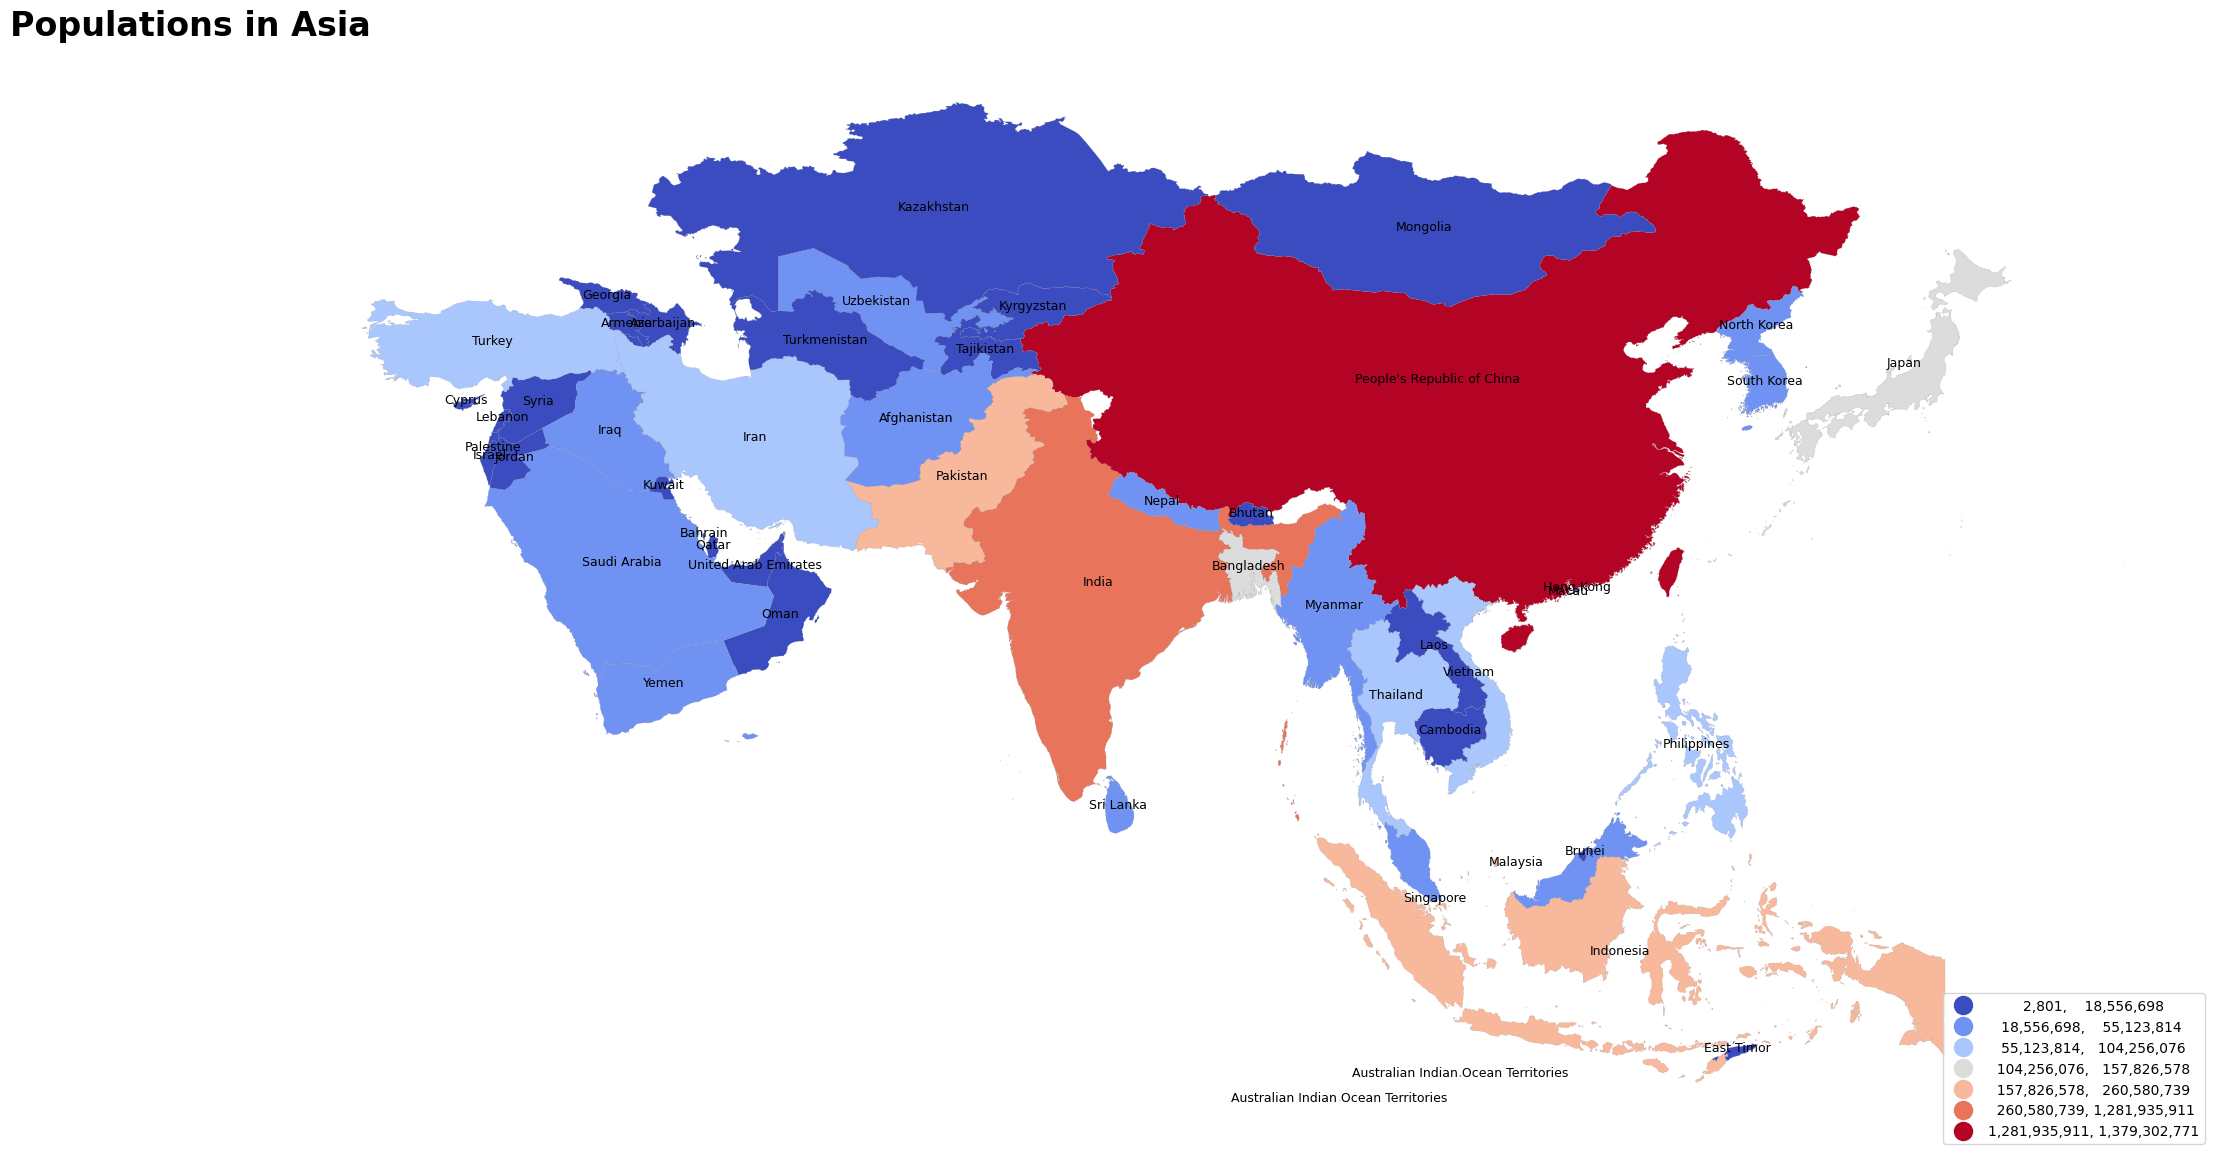

In [ ]:
fig, ax = plt.subplots(1, figsize=(25, 50))
asia.plot(ax=ax, column='POP_EST', legend=True, cmap='coolwarm',
                scheme='natural_breaks', k=7, edgecolor='grey', linewidth=.1,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})

#Title
ax.text(0, 60, "Populations in Asia", fontsize=24, color='Black', fontweight='bold', ha='left')

#Remove the border/spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Remove the x & y ticks
ax.set_xticks([])
ax.set_yticks([])

#Add Country names. I want to remove some of the fields from the data but a lot of it is useful. I tried "FORMAL_EN" and it was only after a couple of tries that I found a field that liked.
for idx, row in asia.iterrows():
    ax.annotate(text=row['NAME_EN'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                horizontalalignment='center', fontsize=9, color='black')

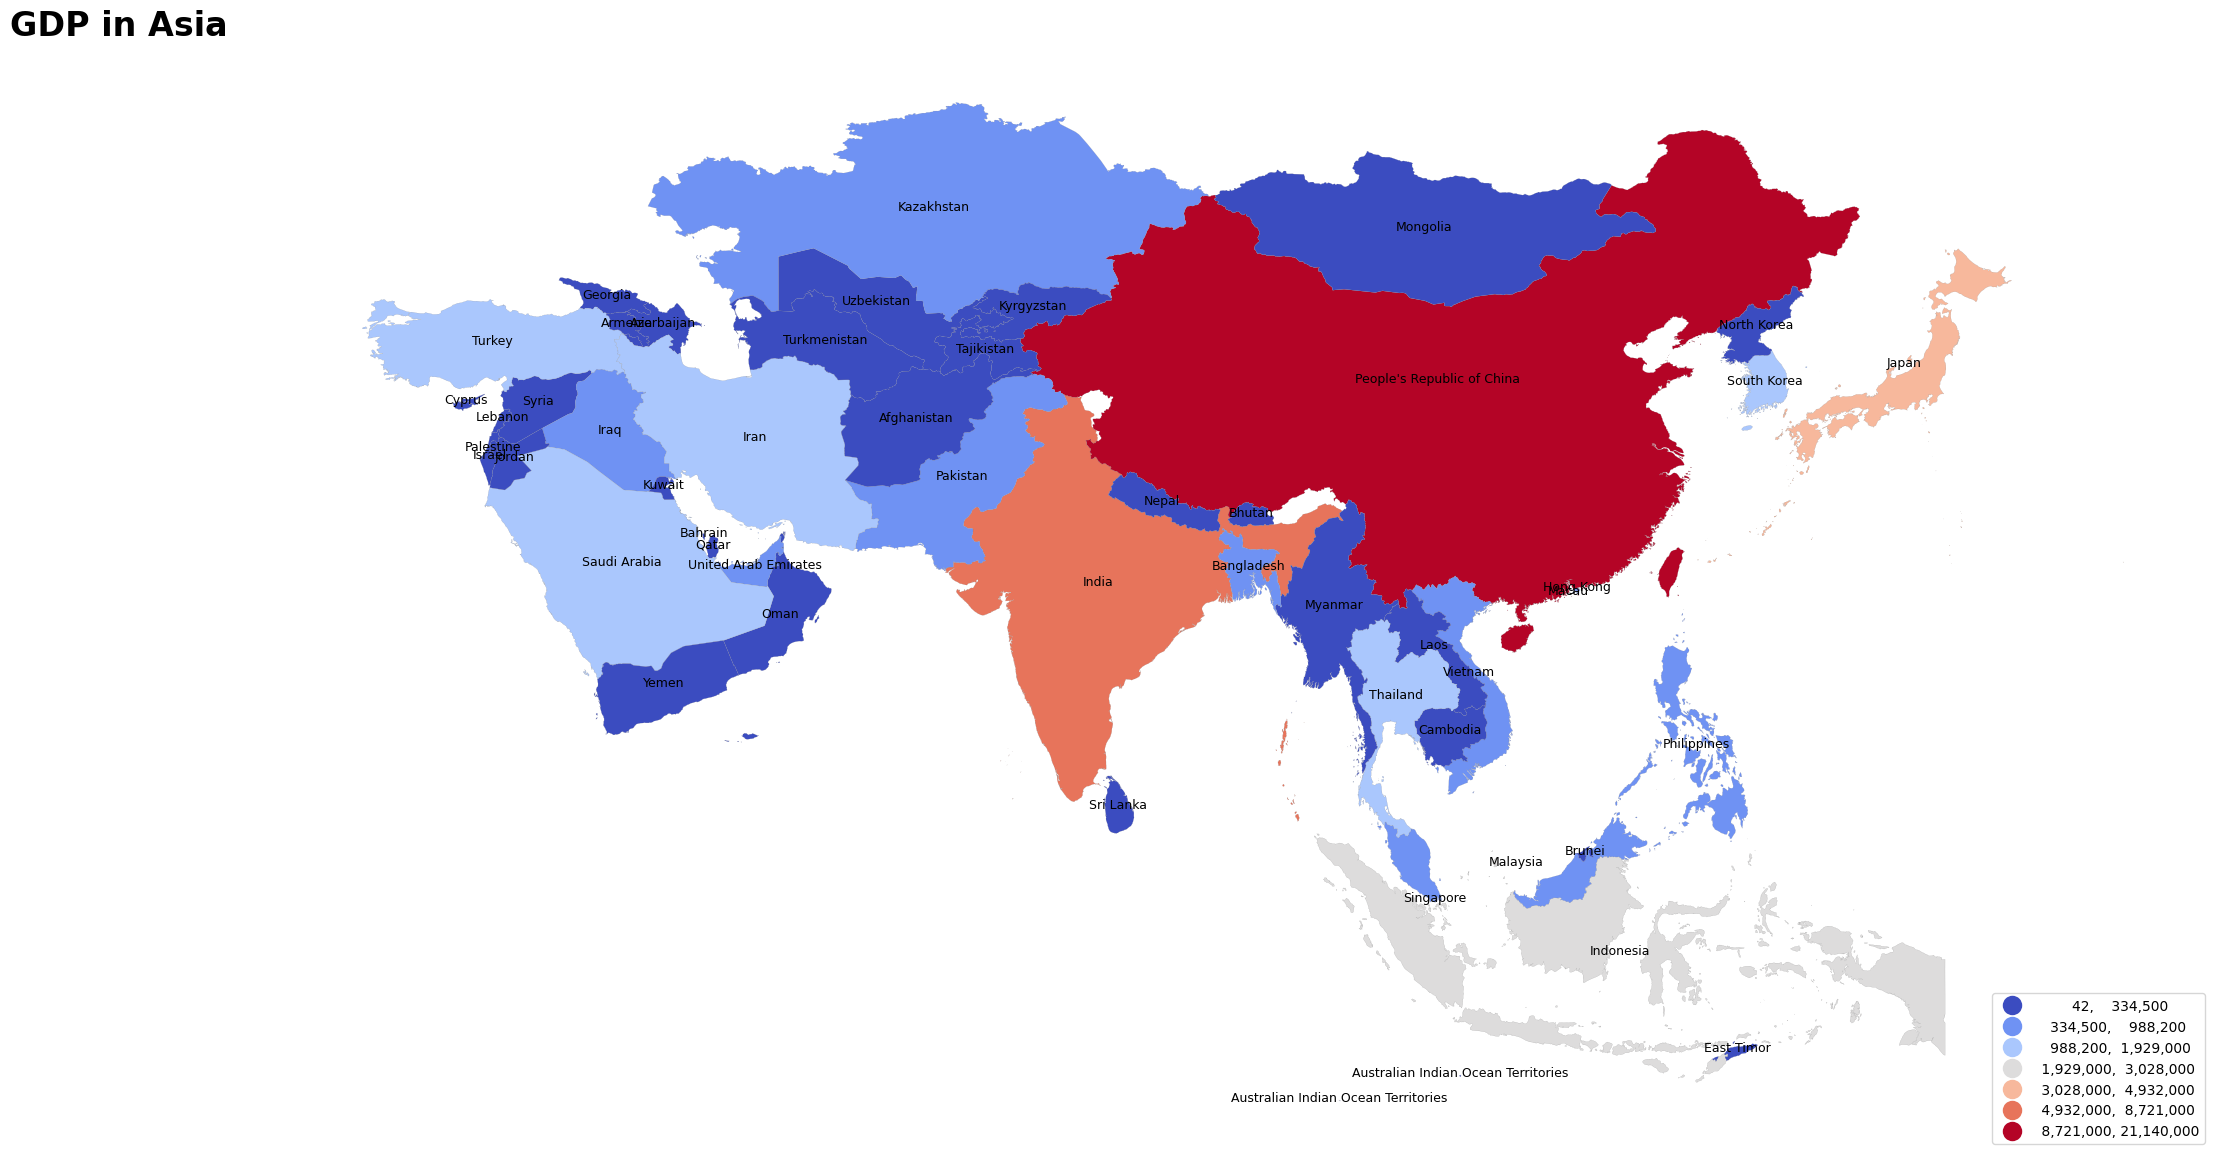

In [ ]:
fig, ax = plt.subplots(1, figsize=(25, 50))
asia.plot(ax=ax, column='GDP_MD_EST', legend=True, cmap='coolwarm',
                scheme='natural_breaks', k=7, edgecolor='grey', linewidth=.1,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})

#Title
ax.text(0, 60, "GDP in Asia", fontsize=24, color='Black', fontweight='bold', ha='left')

#Remove the border/spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Remove the x & y ticks
ax.set_xticks([])
ax.set_yticks([])

#Add Country names. I want to remove some of the fields from the data but a lot of it is useful. I tried "FORMAL_EN" and it was only after a couple of tries that I found a field that liked.
for idx, row in asia.iterrows():
    ax.annotate(text=row['NAME_EN'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                horizontalalignment='center', fontsize=9, color='black')

In [ ]:
fig = px.treemap(asia, path=[px.Constant("Asia"), 'SUBREGION', 'NAME_EN'], values='POP_EST',
                  color='GDP_MD_EST', hover_data=['NAME_EN'],
                  color_continuous_scale='RdBu_r',
                  color_continuous_midpoint=np.average(asia['GDP_MD_EST'], weights=asia['POP_EST']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

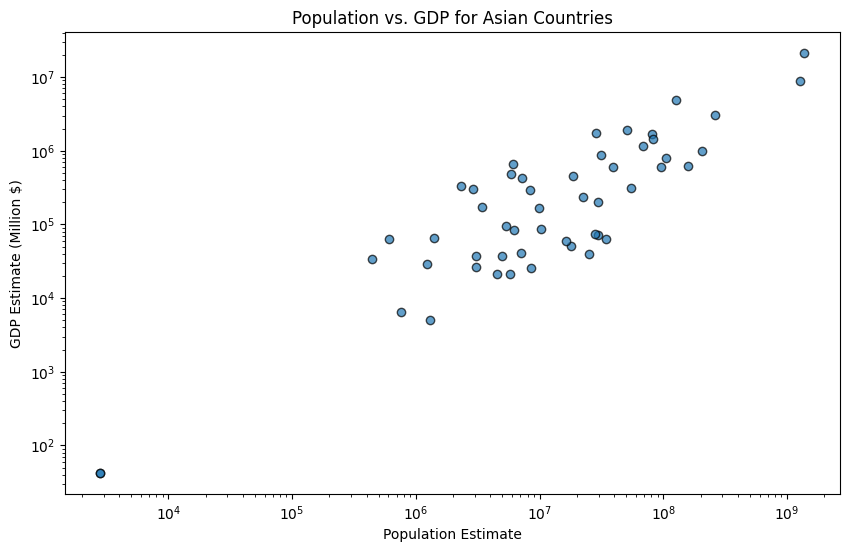

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(asia['POP_EST'], asia['GDP_MD_EST'], alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel('Population Estimate')
plt.ylabel('GDP Estimate (Million $)')
plt.title('Population vs. GDP for Asian Countries')

plt.xscale('log')
plt.yscale('log')
plt.show()